# **Sentiment Analysis on Imbalanced Persian User Reviews**

## 1. Data Loading and Label Construction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data.csv")
df.head()

,Text,Score,Suggestion
0,این اولین تجربه من برای خرید ایفون هست امروز...,100,1
1,خرید این محصول رو توصیه میکنم,84,1
2,1 ساله این گوشی رو دارم هیچ نقطه ضعفی ازش ند...,60,1
3,سلام خدمت دوستان این گوشی از همه نظر عالی کیف...,96,1
4,سلام دوستانی که نگران شکستن صفحه نمایش هستند ا...,92,1


In [3]:
print("Shape Of Data : ",df.shape)

Shape Of Data :  (3261, 3)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261 entries, 0 to 3260
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        3261 non-null   object
 1   Score       3261 non-null   int64 
 2   Suggestion  3261 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 76.6+ KB
None


In [5]:
print(df.isnull().sum())

Text          0
Score         0
Suggestion    0
dtype: int64


In [6]:
pd.DataFrame(df["Suggestion"].value_counts().sort_index())

,count
Suggestion,
1,2382
2,419
3,460


In [7]:
pd.DataFrame(df["Score"].value_counts().sort_index())

,count
Score,
0,37
4,10
8,8
10,1
12,8
16,13
20,23
24,17
28,24


In [8]:
def Score_to_label(score):
    if score <= 20 :
        return "Negative"
    elif score >=40 :
        return "Positive"
    else :
        return "neutral"

df["label"] = df["Score"].apply(Score_to_label)
df = df[df['label'] != 'neutral'].reset_index(drop=True)
df

,Text,Score,Suggestion,label
0,این اولین تجربه من برای خرید ایفون هست امروز...,100,1,Positive
1,خرید این محصول رو توصیه میکنم,84,1,Positive
2,1 ساله این گوشی رو دارم هیچ نقطه ضعفی ازش ند...,60,1,Positive
3,سلام خدمت دوستان این گوشی از همه نظر عالی کیف...,96,1,Positive
4,سلام دوستانی که نگران شکستن صفحه نمایش هستند ا...,92,1,Positive
...,...,...,...,...
3161,کیفت ساختش خوبه تنوعش هم خوبه فقط مشکلش اینه...,84,2,Positive
3162,خیلی خوب و به درد بخوره و اندازشم عالیه,100,1,Positive
3163,عالیه خیلی دوسش دارم قیمتش یه کم زیاده ولی به ...,100,1,Positive
3164,من این مینی فرز رو از دیحیکالا سفارش دادم و به...,84,1,Positive


In [9]:
df[df["label"]=='Negative']

,Text,Score,Suggestion,label
42,تو یه کلمه داغ میکنه زیاد دست رو میسوزونه عمل...,20,3,Negative
66,بسیار گوشی بیکیفت و ظریف و کند هست اصلا راضی ...,16,3,Negative
95,لوازم جانبی نیست برای این مدل هر چند همون اول...,0,3,Negative
164,از لحاظ کیفیت صفحه کیبورد و تاج بدترین لپ تاب...,16,3,Negative
170,به درد نخور لپ تاپ دنیا,20,3,Negative
...,...,...,...,...
2954,اگر قبلا بوش داشتید هیچ وقت نخرینش چون کاملا ک...,20,3,Negative
3021,کیفیت بسیار بد مگنت ها درجا کنده شد,4,3,Negative
3022,مگنت ها به محض چسباندن به یخچال کنده شد و با چ...,4,3,Negative
3114,من این پنکه رو با توجه سابقه ی پارس خزر خریدم ...,4,3,Negative


In [10]:
pd.DataFrame(df["label"].value_counts())

,count
label,
Positive,3066
Negative,100


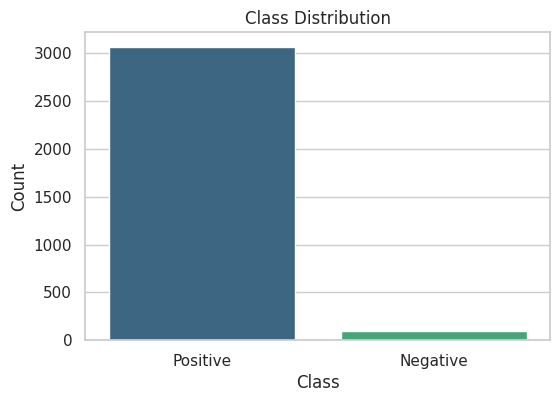

In [11]:
sns.set_theme(style="whitegrid")

counts = df["label"].value_counts().reset_index()
counts.columns = ["label", "count"]

plt.figure(figsize=(6,4))
sns.barplot(data=counts,x="label", y="count", hue="label", palette="viridis")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

## 2. Text Normalization and Cleaning

In [12]:
import re

emoji_pattern = re.compile("""["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
"]+""", flags=re.UNICODE)

def normalize_arabic_chars(text: str) -> str:
    text = text.replace('ي', 'ی').replace('ى', 'ی')
    text = text.replace('ك', 'ک')
    return text

def convert_persian_digits(text: str) -> str:
    persian_digits = '۰۱۲۳۴۵۶۷۸۹'
    english_digits = '0123456789'
    trans_table = str.maketrans(''.join(persian_digits), ''.join(english_digits))
    return text.translate(trans_table)

def clean_persian_text(text: str) -> str:
    if not isinstance(text, str):
        return ""

    text = normalize_arabic_chars(text)
    text = convert_persian_digits(text)

    text = re.sub(r'http\S+|www\.\S+', ' ', text)

    text = re.sub(r'\S+@\S+', ' ', text)

    text = re.sub(r'[@#]\S+', ' ', text)

    text = emoji_pattern.sub(' ', text)

    text = re.sub(r'[^۰-۹0-9آ-یئءچژگۀ۱۲۳۴۵۶۷۸۹\s]', ' ', text)

    text = re.sub(r'\s+', ' ', text).strip()

    text = text.lower()

    return text

df['clean_text'] = df['Text'].astype(str).apply(clean_persian_text)
df[['Text', 'clean_text']].head(10)

,Text,clean_text
0,این اولین تجربه من برای خرید ایفون هست امروز...,این اولین تجربه من برای خرید ایفون هست امروز ب...
1,خرید این محصول رو توصیه میکنم,خرید این محصول رو توصیه میکنم
2,1 ساله این گوشی رو دارم هیچ نقطه ضعفی ازش ند...,1 ساله این گوشی رو دارم هیچ نقطه ضعفی ازش ندیدم
3,سلام خدمت دوستان این گوشی از همه نظر عالی کیف...,سلام خدمت دوستان این گوشی از همه نظر عالی کیفی...
4,سلام دوستانی که نگران شکستن صفحه نمایش هستند ا...,سلام دوستانی که نگران شکستن صفحه نمایش هستند ا...
5,من پکیج کاملش روخریدم ازهرنظرعالیه هیچ نقد...,من پکیج کاملش روخریدم ازهرنظرعالیه هیچ نقدوایر...
6,اول از همه خوشحالم که بالاخره نسخه های 128 گیگ...,اول از همه خوشحالم که بالاخره نسخه های 128 گیگ...
7,من دو ماهه خریدم واقعا راضیم دوربینشم عالیه ...,من دو ماهه خریدم واقعا راضیم دوربینشم عالیه به...
8,بنظر من گوشی خوب و مقرون به صرفه ای بود توی ای...,بنظر من گوشی خوب و مقرون به صرفه ای بود توی ای...
9,از خریدم راضی ام و گوشی بینظیریه منتهی یه ایر...,از خریدم راضی ام و گوشی بینظیریه منتهی یه ایرا...


## 3. Classical approach: TF-IDF + machine learning models

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df['clean_text']
y = df['label']

le = LabelEncoder()
y_all = le.fit_transform(y)

X_train_text, X_test_text, y_train_tfidf, y_test_tfidf = train_test_split(X, y_all, test_size=0.2, random_state=42, stratify=y_all)

tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    min_df=5,
    max_df=0.9
)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
X_test_tfidf  = tfidf_vectorizer.transform(X_test_text)

In [ ]:
print(X_train_tfidf.shape)

(2532, 5227)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

===== Logistic Regression (TF-IDF) =====
Accuracy:  0.9685
Precision: 0.9379 | Recall: 0.9685 | F1: 0.9529

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.97      1.00      0.98       614

    accuracy                           0.97       634
   macro avg       0.48      0.50      0.49       634
weighted avg       0.94      0.97      0.95       634



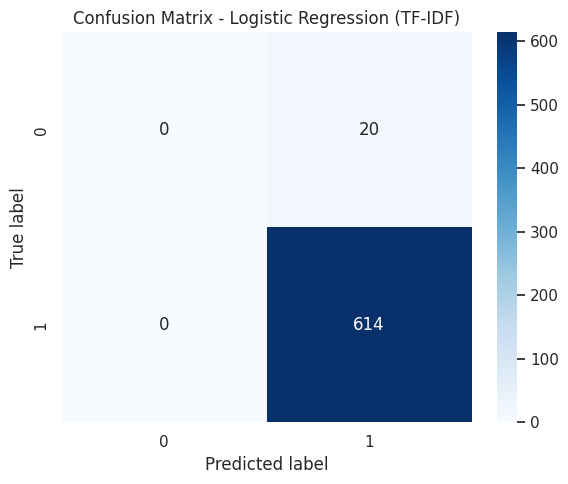

===== Linear SVM (TF-IDF) =====
Accuracy:  0.9716
Precision: 0.9724 | Recall: 0.9716 | F1: 0.9602

              precision    recall  f1-score   support

           0       1.00      0.10      0.18        20
           1       0.97      1.00      0.99       614

    accuracy                           0.97       634
   macro avg       0.99      0.55      0.58       634
weighted avg       0.97      0.97      0.96       634



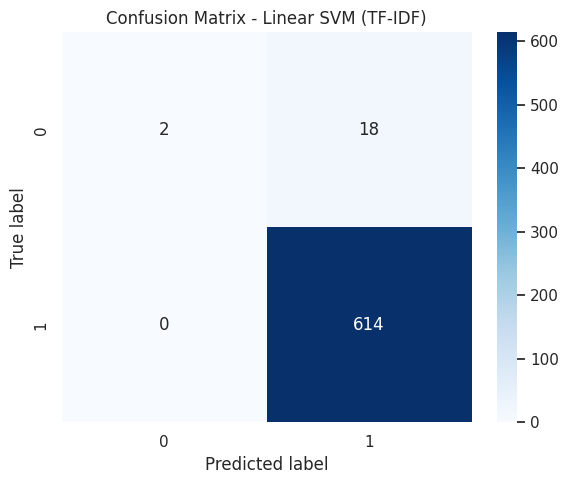

===== Random Forest (TF-IDF) =====
Accuracy:  0.9716
Precision: 0.9724 | Recall: 0.9716 | F1: 0.9602

              precision    recall  f1-score   support

           0       1.00      0.10      0.18        20
           1       0.97      1.00      0.99       614

    accuracy                           0.97       634
   macro avg       0.99      0.55      0.58       634
weighted avg       0.97      0.97      0.96       634



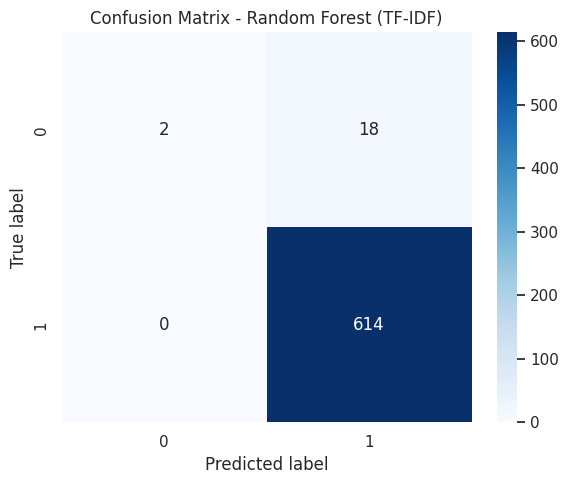

===== KNN (TF-IDF) =====
Accuracy:  0.9716
Precision: 0.9724 | Recall: 0.9716 | F1: 0.9602

              precision    recall  f1-score   support

           0       1.00      0.10      0.18        20
           1       0.97      1.00      0.99       614

    accuracy                           0.97       634
   macro avg       0.99      0.55      0.58       634
weighted avg       0.97      0.97      0.96       634



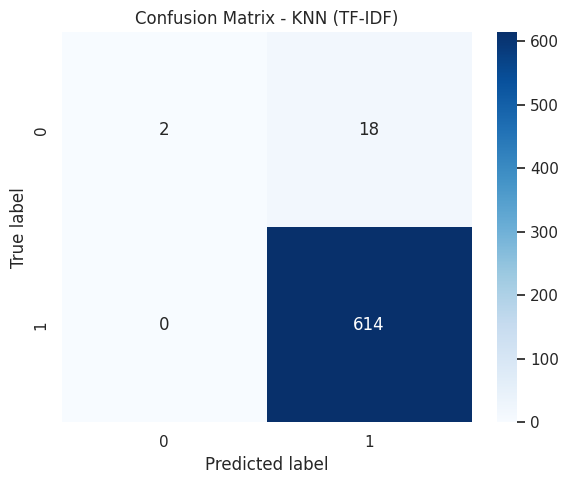

===== MLP (TF-IDF) =====
Accuracy:  0.9685
Precision: 0.9566 | Recall: 0.9685 | F1: 0.9581

              precision    recall  f1-score   support

           0       0.50      0.10      0.17        20
           1       0.97      1.00      0.98       614

    accuracy                           0.97       634
   macro avg       0.74      0.55      0.58       634
weighted avg       0.96      0.97      0.96       634



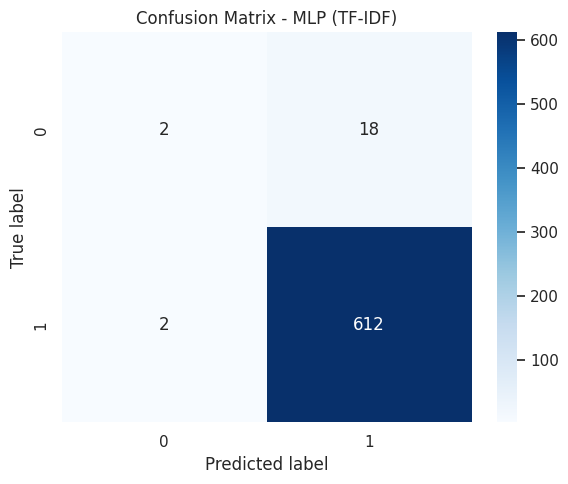

===== XGBoost (TF-IDF) =====
Accuracy:  0.9716
Precision: 0.9724 | Recall: 0.9716 | F1: 0.9602

              precision    recall  f1-score   support

           0       1.00      0.10      0.18        20
           1       0.97      1.00      0.99       614

    accuracy                           0.97       634
   macro avg       0.99      0.55      0.58       634
weighted avg       0.97      0.97      0.96       634



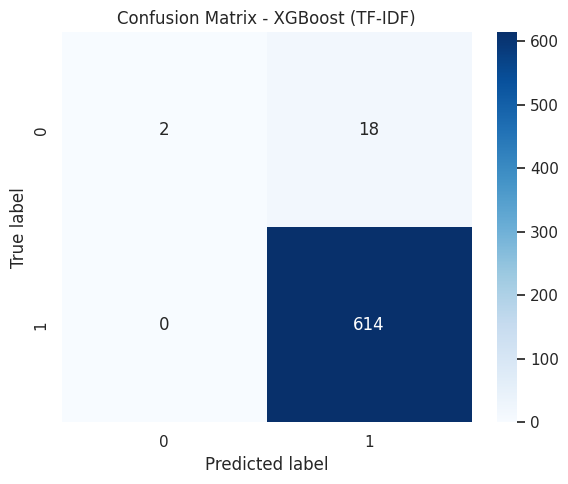

[LightGBM] [Info] Number of positive: 2452, number of negative: 80
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012984 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29131
[LightGBM] [Info] Number of data points in the train set: 2532, number of used features: 1178
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.968404 -> initscore=3.422633
[LightGBM] [Info] Start training from score 3.422633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

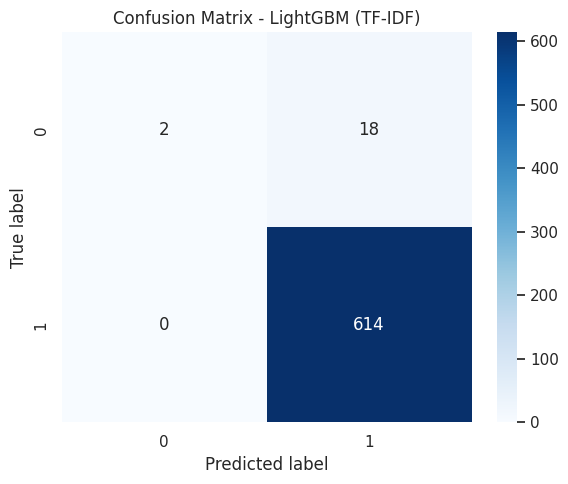

In [ ]:
tfidf_results = []

def evaluate_model_tfidf(name, model):
    model.fit(X_train_tfidf, y_train_tfidf)
    y_pred = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test_tfidf, y_pred)
    p, r, f, _ = precision_recall_fscore_support(
        y_test_tfidf, y_pred, average="weighted", zero_division=0
    )

    tfidf_results.append([name, acc, p, r, f])

    print(f"===== {name} (TF-IDF) =====")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {p:.4f} | Recall: {r:.4f} | F1: {f:.4f}")
    print()
    print(classification_report(y_test_tfidf, y_pred, zero_division=0))

    labels = sorted(np.unique(y_test_tfidf))
    cm = confusion_matrix(y_test_tfidf, y_pred, labels=labels)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm,
                annot=True,
                fmt="d",
                cmap="Blues",
                xticklabels=labels,
                yticklabels=labels)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title(f"Confusion Matrix - {name} (TF-IDF)")
    plt.tight_layout()
    plt.show()


# Models
lr_t = LogisticRegression(max_iter=3000)
evaluate_model_tfidf("Logistic Regression", lr_t)

svm_t = LinearSVC()
evaluate_model_tfidf("Linear SVM", svm_t)

rf_t = RandomForestClassifier(n_estimators=300)
evaluate_model_tfidf("Random Forest", rf_t)

knn_t = KNeighborsClassifier(
    n_neighbors=5,
    weights="distance",
    n_jobs=-1
)
evaluate_model_tfidf("KNN", knn_t)

mlp_t = MLPClassifier(
    hidden_layer_sizes=(128,),
    activation="relu",
    solver="adam",
    random_state=42
)
evaluate_model_tfidf("MLP", mlp_t)

xgb_t = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="mlogloss",
    n_jobs=-1,
    random_state=42
)
evaluate_model_tfidf("XGBoost", xgb_t)

lgbm_t = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
evaluate_model_tfidf("LightGBM", lgbm_t)

In [ ]:
results_df = pd.DataFrame(tfidf_results,columns=["Model", "Accuracy", "Precision", "Recall", "F1"])
results_df = results_df.sort_values("F1", ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1
1,Linear SVM,0.971609,0.972417,0.971609,0.960199
2,Random Forest,0.971609,0.972417,0.971609,0.960199
3,KNN,0.971609,0.972417,0.971609,0.960199
6,LightGBM,0.971609,0.972417,0.971609,0.960199
5,XGBoost,0.971609,0.972417,0.971609,0.960199
4,MLP,0.968454,0.956557,0.968454,0.958142
0,Logistic Regression,0.968454,0.937904,0.968454,0.952934


## 4. BGE-M3 Sentence Embeddings

In [ ]:
from sentence_transformers import SentenceTransformer

emb_model = SentenceTransformer("BAAI/bge-m3")

embeddings = emb_model.encode(
    df['clean_text'].tolist(),
    batch_size=32,
    show_progress_bar=True
)

embeddings.shape

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

Batches:   0%|          | 0/99 [00:00<?, ?it/s]

(3166, 1024)

In [ ]:
X = embeddings
y = df['label']

X_train_emb, X_test_emb, y_train_emb, y_test_emb = train_test_split(X, y_all, test_size=0.2, random_state=42, stratify=y)


===== Logistic Regression (BGE-M3) =====
Accuracy:  0.9685
Precision: 0.9379 | Recall: 0.9685 | F1: 0.9529

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.97      1.00      0.98       614

    accuracy                           0.97       634
   macro avg       0.48      0.50      0.49       634
weighted avg       0.94      0.97      0.95       634



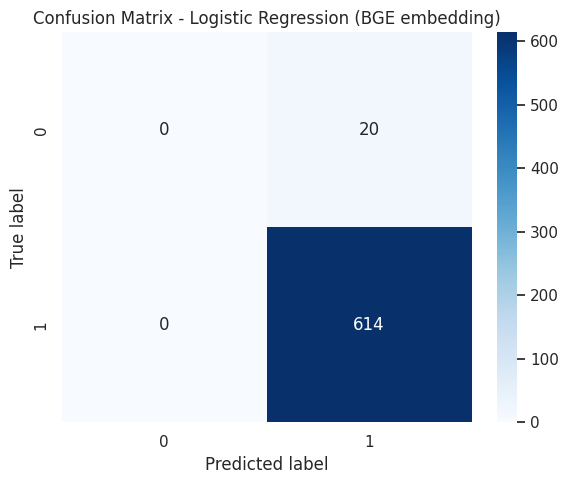

===== Linear SVM (BGE-M3) =====
Accuracy:  0.9716
Precision: 0.9724 | Recall: 0.9716 | F1: 0.9602

              precision    recall  f1-score   support

           0       1.00      0.10      0.18        20
           1       0.97      1.00      0.99       614

    accuracy                           0.97       634
   macro avg       0.99      0.55      0.58       634
weighted avg       0.97      0.97      0.96       634



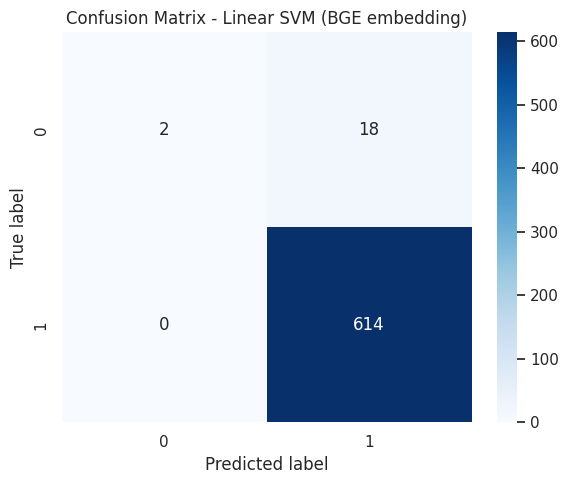

===== Random Forest (BGE-M3) =====
Accuracy:  0.9716
Precision: 0.9724 | Recall: 0.9716 | F1: 0.9602

              precision    recall  f1-score   support

           0       1.00      0.10      0.18        20
           1       0.97      1.00      0.99       614

    accuracy                           0.97       634
   macro avg       0.99      0.55      0.58       634
weighted avg       0.97      0.97      0.96       634



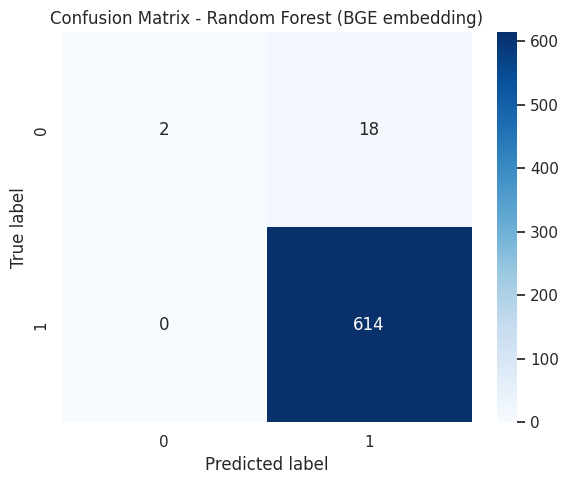

===== KNN (BGE-M3) =====
Accuracy:  0.9716
Precision: 0.9660 | Recall: 0.9716 | F1: 0.9623

              precision    recall  f1-score   support

           0       0.75      0.15      0.25        20
           1       0.97      1.00      0.99       614

    accuracy                           0.97       634
   macro avg       0.86      0.57      0.62       634
weighted avg       0.97      0.97      0.96       634



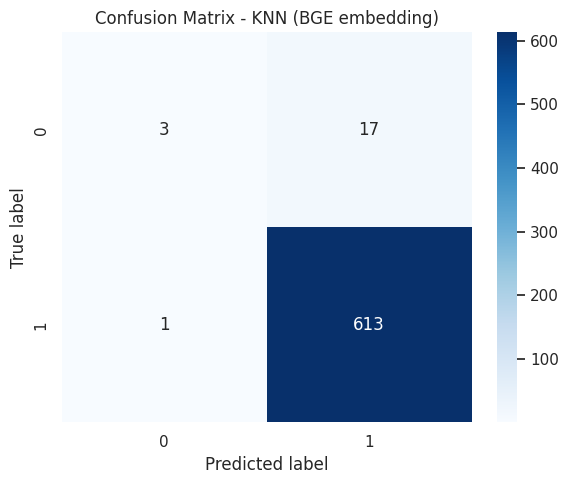

===== MLP (BGE-M3) =====
Accuracy:  0.9543
Precision: 0.9452 | Recall: 0.9543 | F1: 0.9495

              precision    recall  f1-score   support

           0       0.15      0.10      0.12        20
           1       0.97      0.98      0.98       614

    accuracy                           0.95       634
   macro avg       0.56      0.54      0.55       634
weighted avg       0.95      0.95      0.95       634



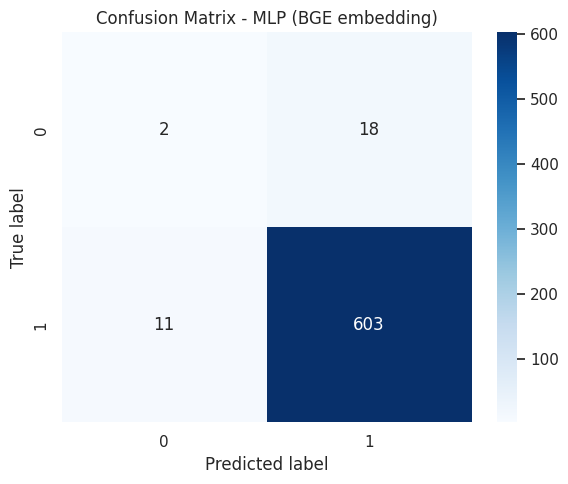

===== XGBoost (BGE-M3) =====
Accuracy:  0.9700
Precision: 0.9619 | Recall: 0.9700 | F1: 0.9592

              precision    recall  f1-score   support

           0       0.67      0.10      0.17        20
           1       0.97      1.00      0.98       614

    accuracy                           0.97       634
   macro avg       0.82      0.55      0.58       634
weighted avg       0.96      0.97      0.96       634



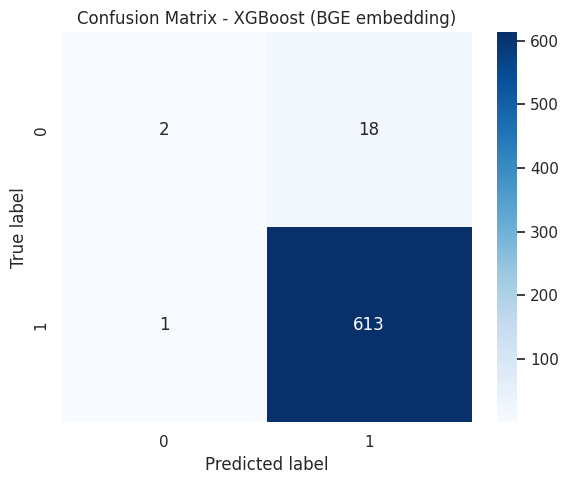

[LightGBM] [Info] Number of positive: 2452, number of negative: 80
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 261120
[LightGBM] [Info] Number of data points in the train set: 2532, number of used features: 1024
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.968404 -> initscore=3.422633
[LightGBM] [Info] Start training from score 3.422633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

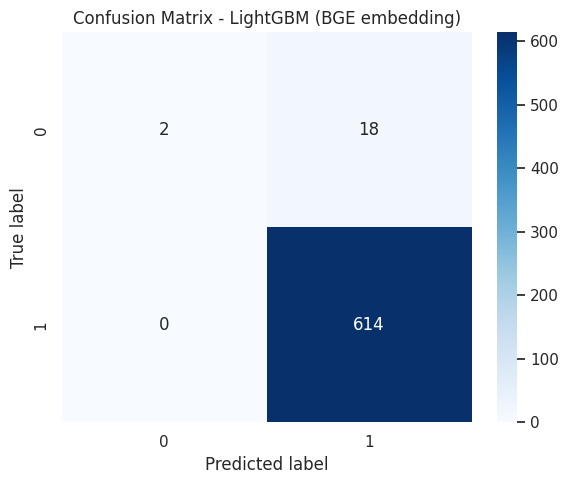

In [ ]:
BGE_M3_results = []

def evaluate_model_BGE(name, model):
    model.fit(X_train_emb, y_train_emb)
    y_pred = model.predict(X_test_emb)

    acc = accuracy_score(y_test_emb, y_pred)
    p, r, f, _ = precision_recall_fscore_support(
        y_test_emb, y_pred, average="weighted", zero_division=0
    )

    BGE_M3_results.append([name, acc, p, r, f])

    print(f"===== {name} (BGE-M3) =====")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {p:.4f} | Recall: {r:.4f} | F1: {f:.4f}")
    print()
    print(classification_report(y_test_emb, y_pred, zero_division=0))

    labels = sorted(np.unique(y_test_emb))
    cm = confusion_matrix(y_test_emb, y_pred, labels=labels)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm,
                annot=True,
                fmt="d",
                cmap="Blues",
                xticklabels=labels,
                yticklabels=labels)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title(f"Confusion Matrix - {name} (BGE embedding)")
    plt.tight_layout()
    plt.show()


# Models
lr_t = LogisticRegression(max_iter=3000)
evaluate_model_BGE("Logistic Regression", lr_t)

svm_t = LinearSVC()
evaluate_model_BGE("Linear SVM", svm_t)

rf_t = RandomForestClassifier(n_estimators=300)
evaluate_model_BGE("Random Forest", rf_t)

knn_t = KNeighborsClassifier(
    n_neighbors=5,
    weights="distance",
    n_jobs=-1
)
evaluate_model_BGE("KNN", knn_t)

mlp_t = MLPClassifier(
    hidden_layer_sizes=(128,),
    activation="relu",
    solver="adam",
    random_state=42
)
evaluate_model_BGE("MLP", mlp_t)

xgb_t = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="mlogloss",
    n_jobs=-1,
    random_state=42
)
evaluate_model_BGE("XGBoost", xgb_t)

lgbm_t = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
evaluate_model_BGE("LightGBM", lgbm_t)

In [ ]:
resultsBGE_df = pd.DataFrame(BGE_M3_results,columns=["Model", "Accuracy", "Precision", "Recall", "F1"])
resultsBGE_df = resultsBGE_df.sort_values("F1", ascending=False)
resultsBGE_df

,Model,Accuracy,Precision,Recall,F1
3,KNN,0.971609,0.965981,0.971609,0.962328
2,Random Forest,0.971609,0.972417,0.971609,0.960199
1,Linear SVM,0.971609,0.972417,0.971609,0.960199
6,LightGBM,0.971609,0.972417,0.971609,0.960199
5,XGBoost,0.970032,0.961858,0.970032,0.959161
0,Logistic Regression,0.968454,0.937904,0.968454,0.952934
4,MLP,0.954259,0.945236,0.954259,0.949537


In [ ]:
results_df["Feature"] = "TF-IDF"
resultsBGE_df["Feature"] = "BGE-M3"
all_results_df = pd.concat([results_df, resultsBGE_df], ignore_index=True)
all_results_df = all_results_df.sort_values("F1", ascending=False).reset_index(drop=True)
all_results_df = pd.concat([results_df, resultsBGE_df], ignore_index=True)
all_results_df


,Model,Accuracy,Precision,Recall,F1,Feature
0,Linear SVM,0.971609,0.972417,0.971609,0.960199,TF-IDF
1,Random Forest,0.971609,0.972417,0.971609,0.960199,TF-IDF
2,KNN,0.971609,0.972417,0.971609,0.960199,TF-IDF
3,LightGBM,0.971609,0.972417,0.971609,0.960199,TF-IDF
4,XGBoost,0.971609,0.972417,0.971609,0.960199,TF-IDF
5,MLP,0.968454,0.956557,0.968454,0.958142,TF-IDF
6,Logistic Regression,0.968454,0.937904,0.968454,0.952934,TF-IDF
7,KNN,0.971609,0.965981,0.971609,0.962328,BGE-M3
8,Random Forest,0.971609,0.972417,0.971609,0.960199,BGE-M3
9,Linear SVM,0.971609,0.972417,0.971609,0.960199,BGE-M3


## 5. ParsBERT Embeddings

In [ ]:
from sentence_transformers import SentenceTransformer

parsbert_st = SentenceTransformer("myrkur/sentence-transformer-parsbert-fa-2.0")

embeddings_parsbert = parsbert_st.encode(
    df["clean_text"].tolist(),
    batch_size=32,
    show_progress_bar=True
)

embeddings_parsbert.shape

Batches:   0%|          | 0/99 [00:00<?, ?it/s]

(3166, 768)

In [ ]:
X = embeddings_parsbert

X_train_embp, X_test_embp, y_train_embp, y_test_embp = train_test_split(X, y_all, test_size=0.2, random_state=42, stratify=y)


===== Logistic Regression (ParsBERT) =====
Accuracy:  0.9685
Precision: 0.9595 | Recall: 0.9685 | F1: 0.9618

              precision    recall  f1-score   support

           0       0.50      0.20      0.29        20
           1       0.97      0.99      0.98       614

    accuracy                           0.97       634
   macro avg       0.74      0.60      0.63       634
weighted avg       0.96      0.97      0.96       634



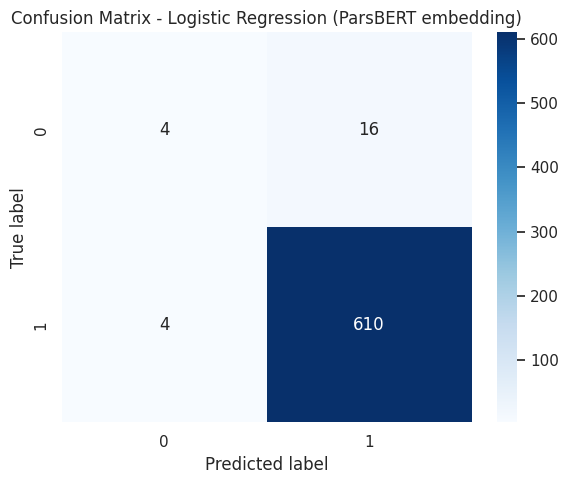

===== Linear SVM (ParsBERT) =====
Accuracy:  0.9495
Precision: 0.9495 | Recall: 0.9495 | F1: 0.9495

              precision    recall  f1-score   support

           0       0.20      0.20      0.20        20
           1       0.97      0.97      0.97       614

    accuracy                           0.95       634
   macro avg       0.59      0.59      0.59       634
weighted avg       0.95      0.95      0.95       634



/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


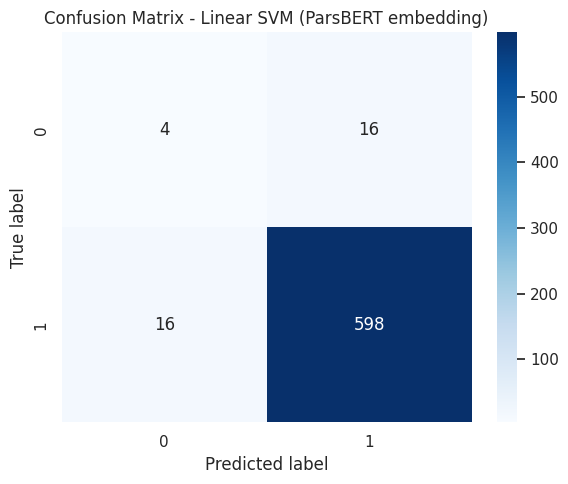

===== Random Forest (ParsBERT) =====
Accuracy:  0.9716
Precision: 0.9724 | Recall: 0.9716 | F1: 0.9602

              precision    recall  f1-score   support

           0       1.00      0.10      0.18        20
           1       0.97      1.00      0.99       614

    accuracy                           0.97       634
   macro avg       0.99      0.55      0.58       634
weighted avg       0.97      0.97      0.96       634



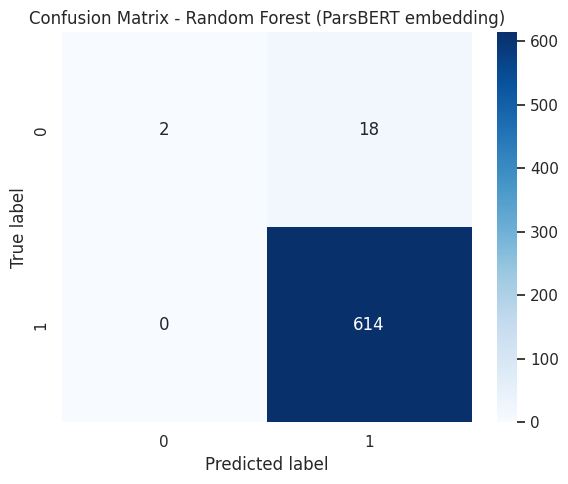

===== KNN (ParsBERT) =====
Accuracy:  0.9732
Precision: 0.9739 | Recall: 0.9732 | F1: 0.9635

              precision    recall  f1-score   support

           0       1.00      0.15      0.26        20
           1       0.97      1.00      0.99       614

    accuracy                           0.97       634
   macro avg       0.99      0.57      0.62       634
weighted avg       0.97      0.97      0.96       634



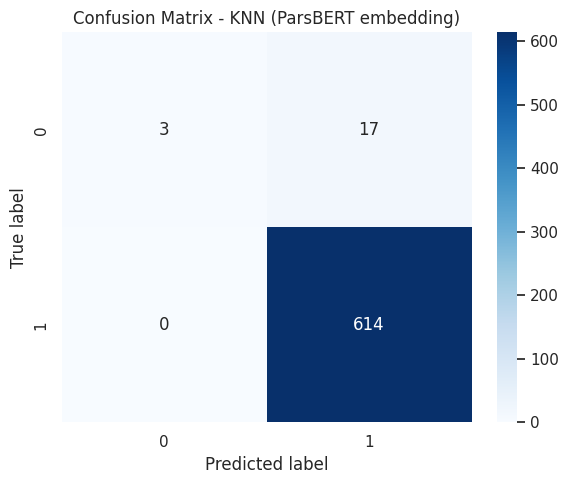

===== MLP (ParsBERT) =====
Accuracy:  0.9732
Precision: 0.9678 | Recall: 0.9732 | F1: 0.9669

              precision    recall  f1-score   support

           0       0.71      0.25      0.37        20
           1       0.98      1.00      0.99       614

    accuracy                           0.97       634
   macro avg       0.85      0.62      0.68       634
weighted avg       0.97      0.97      0.97       634



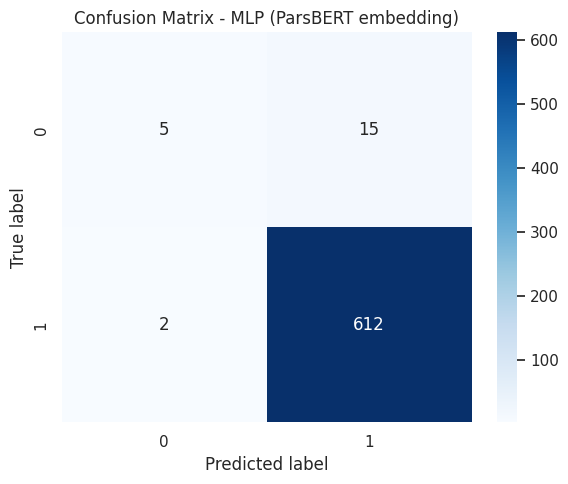

===== XGBoost (ParsBERT) =====
Accuracy:  0.9716
Precision: 0.9724 | Recall: 0.9716 | F1: 0.9602

              precision    recall  f1-score   support

           0       1.00      0.10      0.18        20
           1       0.97      1.00      0.99       614

    accuracy                           0.97       634
   macro avg       0.99      0.55      0.58       634
weighted avg       0.97      0.97      0.96       634



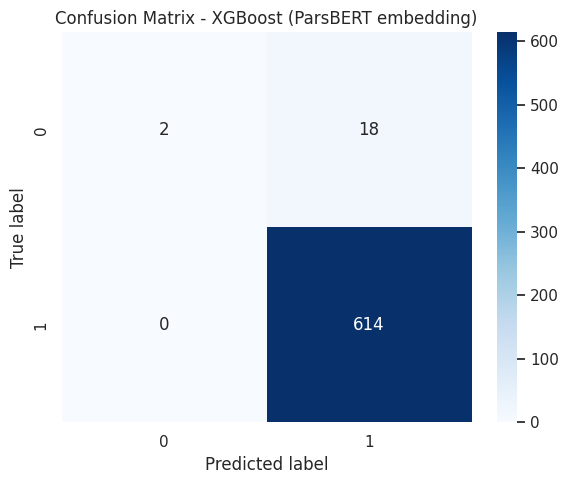

[LightGBM] [Info] Number of positive: 2452, number of negative: 80
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013781 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 2532, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.968404 -> initscore=3.422633
[LightGBM] [Info] Start training from score 3.422633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

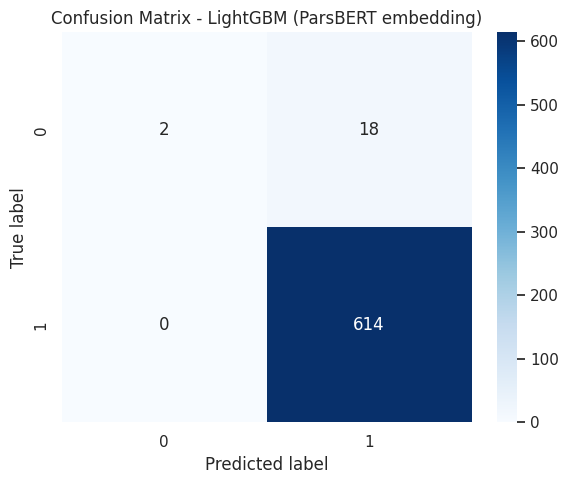

In [ ]:
parsbert_results = []

def evaluate_model_parsbert(name, model):
    model.fit(X_train_embp, y_train_embp)
    y_pred = model.predict(X_test_embp)

    acc = accuracy_score(y_test_embp, y_pred)
    p, r, f, _ = precision_recall_fscore_support(
        y_test_embp, y_pred, average="weighted", zero_division=0
    )

    parsbert_results.append([name, acc, p, r, f])

    print(f"===== {name} (ParsBERT) =====")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {p:.4f} | Recall: {r:.4f} | F1: {f:.4f}")
    print()
    print(classification_report(y_test_embp, y_pred, zero_division=0))

    labels = sorted(np.unique(y_test_embp))
    cm = confusion_matrix(y_test_embp, y_pred, labels=labels)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm,
                annot=True,
                fmt="d",
                cmap="Blues",
                xticklabels=labels,
                yticklabels=labels)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title(f"Confusion Matrix - {name} (ParsBERT embedding)")
    plt.tight_layout()
    plt.show()


# Models
lr_t = LogisticRegression(max_iter=3000)
evaluate_model_parsbert("Logistic Regression", lr_t)

svm_t = LinearSVC()
evaluate_model_parsbert("Linear SVM", svm_t)

rf_t = RandomForestClassifier(n_estimators=300)
evaluate_model_parsbert("Random Forest", rf_t)

knn_t = KNeighborsClassifier(
    n_neighbors=5,
    weights="distance",
    n_jobs=-1
)
evaluate_model_parsbert("KNN", knn_t)

mlp_t = MLPClassifier(
    hidden_layer_sizes=(128,),
    activation="relu",
    solver="adam",
    random_state=42
)
evaluate_model_parsbert("MLP", mlp_t)

xgb_t = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="mlogloss",
    n_jobs=-1,
    random_state=42
)
evaluate_model_parsbert("XGBoost", xgb_t)

lgbm_t = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
evaluate_model_parsbert("LightGBM", lgbm_t)

In [ ]:
resultspars_df = pd.DataFrame(parsbert_results,columns=["Model", "Accuracy", "Precision", "Recall", "F1"])
resultspars_df = resultspars_df.sort_values("F1", ascending=False)
resultspars_df

,Model,Accuracy,Precision,Recall,F1
4,MLP,0.973186,0.967818,0.973186,0.966871
3,KNN,0.973186,0.973909,0.973186,0.963460
0,Logistic Regression,0.968454,0.959474,0.968454,0.961847
5,XGBoost,0.971609,0.972417,0.971609,0.960199
2,Random Forest,0.971609,0.972417,0.971609,0.960199
6,LightGBM,0.971609,0.972417,0.971609,0.960199
1,Linear SVM,0.949527,0.949527,0.949527,0.949527


## 6. Dealing with Data Imbalance via **Synthetic Negative Samples**

The dataset is highly imbalanced: positive reviews are much more frequent than negative ones.  
To address this, we:

1. **Visualize the original class distribution** to confirm the imbalance.
2. Use an LLM (via the AvalAI `gpt-4o-mini` API) to generate additional **negative** samples:
   - Select a subset of positive reviews.
   - For each positive review, ask the model to produce several *realistic negative* reviews that:
     - Remain on the same topic (similar product/service).
     - Are phrased naturally in Persian.
     - Express dissatisfaction without being overly extreme or offensive.
3. Clean the generated text:
   - Remove numbering patterns like `1.`, `2.` at the start of lines.
   - Store generated samples in a separate DataFrame `synthetic_df` with:
     - `clean_text`: generated comment
     - `label`: `"Negative"`
     - `synthetic`: `1` (flag for synthetic data)
4. Attach a `synthetic = 0` flag to the original data and concatenate real and synthetic samples into `all_df`.
5. Plot the new class distribution after augmentation to confirm that the dataset is more balanced.


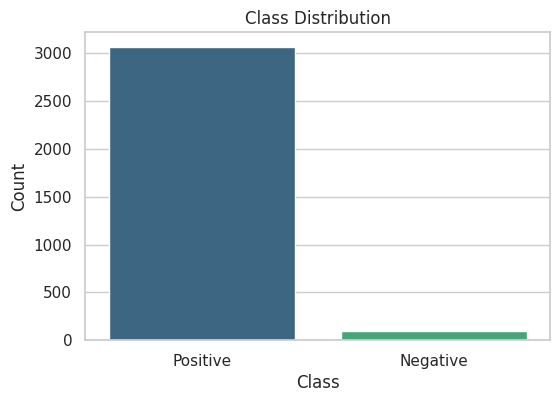

In [ ]:
sns.set_theme(style="whitegrid")

counts = df["label"].value_counts().reset_index()
counts.columns = ["label", "count"]

plt.figure(figsize=(6,4))
sns.barplot(data=counts,x="label", y="count", hue="label", palette="viridis")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
df['label'].value_counts()

,count
label,
Positive,3066
Negative,100


In [ ]:
df

,Text,Score,Suggestion,label,clean_text
0,این اولین تجربه من برای خرید ایفون هست امروز...,100,1,Positive,این اولین تجربه من برای خرید ایفون هست امروز ب...
1,خرید این محصول رو توصیه میکنم,84,1,Positive,خرید این محصول رو توصیه میکنم
2,1 ساله این گوشی رو دارم هیچ نقطه ضعفی ازش ند...,60,1,Positive,1 ساله این گوشی رو دارم هیچ نقطه ضعفی ازش ندیدم
3,سلام خدمت دوستان این گوشی از همه نظر عالی کیف...,96,1,Positive,سلام خدمت دوستان این گوشی از همه نظر عالی کیفی...
4,سلام دوستانی که نگران شکستن صفحه نمایش هستند ا...,92,1,Positive,سلام دوستانی که نگران شکستن صفحه نمایش هستند ا...
...,...,...,...,...,...
3161,کیفت ساختش خوبه تنوعش هم خوبه فقط مشکلش اینه...,84,2,Positive,کیفت ساختش خوبه تنوعش هم خوبه فقط مشکلش اینه ک...
3162,خیلی خوب و به درد بخوره و اندازشم عالیه,100,1,Positive,خیلی خوب و به درد بخوره و اندازشم عالیه
3163,عالیه خیلی دوسش دارم قیمتش یه کم زیاده ولی به ...,100,1,Positive,عالیه خیلی دوسش دارم قیمتش یه کم زیاده ولی به ...
3164,من این مینی فرز رو از دیحیکالا سفارش دادم و به...,84,1,Positive,من این مینی فرز رو از دیحیکالا سفارش دادم و به...


In [ ]:
from tqdm import tqdm
from openai import OpenAI

# NOTE: I used my own API key here. It has been removed from this notebook, so please insert your own.
client = OpenAI(
    api_key = "YOUR API",
    base_url = "https://api.avalai.ir/v1"
)

In [ ]:
def generate_negatives_from_positive(pos_text: str, n: int = 3,max_retries: int = 3,sleep_base: float = 2.0) -> list[str]:
    system_prompt = (
        "تو نویسنده‌ی کامنت‌های واقعی کاربران در سایت‌ها و اپلیکیشن‌ها هستی. "
        "بر اساس یک نظر مثبت، چند نظر منفی واقعی و طبیعی بساز. "
        "موضوع اصلی جمله را حفظ کن. "
        "از اغراق شدید، توهین، کلمات خیلی زننده و ایموجی استفاده نکن."
    )

    user_prompt = f"""
این یک نظر مثبت است. دقیقا {n} نظر منفی کوتاه و محاوره‌ای بساز
که تجربه‌ی بد مشابهی را توصیف کنند.
هر نظر فقط در یک خط باشد و چیزی اضافه ننویس.

نظر مثبت:
{pos_text}
"""

    for attempt in range(max_retries):
        try:
            resp = client.chat.completions.create(
                model="gpt-4o-mini",
                messages=[
                    {"role": "system", "content": system_prompt},
                    {"role": "user", "content": user_prompt},
                ],
                temperature=0.9,
                max_tokens=100,
            )

            raw = resp.choices[0].message.content
            if not raw:
                return []

            lines = [l.strip() for l in raw.split("\n") if l.strip()]
            return lines[:n]

        except OpenAIError as e:
            msg = str(e)
            if "rate limit" in msg.lower() or "429" in msg:
                wait = sleep_base * (attempt + 1)
                print(f"⚠️ خطای Rate limit، تلاش مجدد بعد از {wait} ثانیه...")
                time.sleep(wait)
                continue
            else:
                print(f"❌ خطا برای این نمونه:\n{pos_text}\n{e}")
                return []

        except Exception as e:
            print(f"❌ خطای غیرمنتظره برای این نمونه:\n{pos_text}\n{e}")
            return []

    return []

In [ ]:
pos_df = df[df["label"] == "Positive"]

pos_sample = pos_df.sample(500, random_state=42)


synthetic_rows = []

for text in tqdm(pos_sample["clean_text"], desc="تولید کامنت‌های منفی"):
    neg_samples = generate_negatives_from_positive(text, n=3)
    for s in neg_samples:
        if not s.strip():
            continue
        synthetic_rows.append({
            "clean_text": s,
            "label": "Negative",
            "synthetic": 1,
        })

synthetic_df = pd.DataFrame(synthetic_rows)

print("تعداد کامنت‌های منفی تولید شده:", len(synthetic_df))
print(synthetic_df.head())

synthetic_df.to_csv("synthetic_negatives.csv", index=False)

تولید کامنت‌های منفی: 100%|██████████| 500/500 [19:26<00:00,  2.33s/it]

تعداد کامنت‌های منفی تولید شده: 1500
                                          clean_text     label  synthetic
0  1. من بدنه‌ی محکم رو انتظار داشتم، ولی خیلی زو...  Negative          1
1  2. فکر می‌کردم کیفیتش بهتر از اینه، اما بعد از...  Negative          1
2  3. بدنه‌اش محکم به نظر می‌رسه، اما در عمل اصلا...  Negative          1
3  1. قیمتش واقعا بالاست و کیفیتش اصلاً بهش نمی‌خ...  Negative          1
4  2. ظاهرش قشنگه ولی بعد از یه مدت کار کردن، سرع...  Negative          1


In [ ]:
synthetic_df = pd.read_csv("synthetic_negatives.csv")
synthetic_df.head()

,clean_text,label,synthetic
0,1. من بدنه‌ی محکم رو انتظار داشتم، ولی خیلی زو...,Negative,1
1,2. فکر می‌کردم کیفیتش بهتر از اینه، اما بعد از...,Negative,1
2,3. بدنه‌اش محکم به نظر می‌رسه، اما در عمل اصلا...,Negative,1
3,1. قیمتش واقعا بالاست و کیفیتش اصلاً بهش نمی‌خ...,Negative,1
4,2. ظاهرش قشنگه ولی بعد از یه مدت کار کردن، سرع...,Negative,1


In [ ]:
synthetic_df["clean_text"] = synthetic_df["clean_text"].str.replace(
    r"^\s*[\d۰-۹]+[.\-\)]\s*", "", regex=True
)

synthetic_df['clean_text'] = synthetic_df['clean_text'].astype(str).apply(clean_persian_text)

In [ ]:
synthetic_df.head()

,clean_text,label,synthetic
0,من بدنه ی محکم رو انتظار داشتم ولی خیلی زود خر...,Negative,1
1,فکر می کردم کیفیتش بهتر از اینه اما بعد از دو ...,Negative,1
2,بدنه اش محکم به نظر می رسه اما در عمل اصلاً را...,Negative,1
3,قیمتش واقعا بالاست و کیفیتش اصلاً بهش نمی خوره,Negative,1
4,ظاهرش قشنگه ولی بعد از یه مدت کار کردن سرعتش پ...,Negative,1


In [ ]:
df['synthetic'] = 0


In [ ]:
df_base = df[["clean_text", "label", "synthetic"]]
synthetic_base = synthetic_df[["clean_text", "label", "synthetic"]]

all_df = pd.concat([df_base, synthetic_base], ignore_index=True)


In [ ]:
print("Shape Of Balanced Data",all_df.shape)

Shape Of Balanced Data (4666, 3)


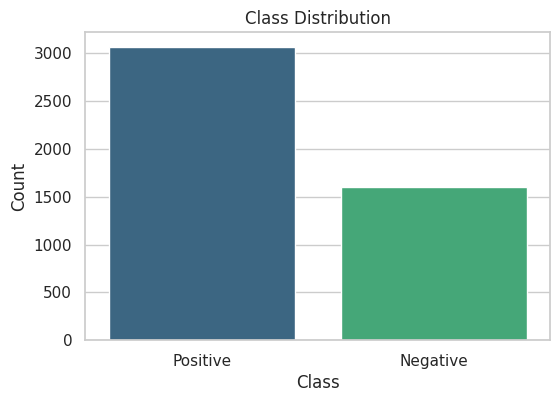

In [ ]:
sns.set_theme(style="whitegrid")

counts = all_df["label"].value_counts().reset_index()
counts.columns = ["label", "count"]

plt.figure(figsize=(6,4))
sns.barplot(data=counts,x="label", y="count", hue="label", palette="viridis")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
all_df['label'].value_counts()

,count
label,
Positive,3066
Negative,1600


## 7. LLM-as-a-Judge: GPT-Based Sentiment Labeling

In addition to training classifiers, we also use an LLM as a **sentiment judge**:

- For each review (`clean_text`), we query a GPT-style model (via AvalAI) with a prompt that asks:

  > Is this review **Positive** or **Negative**?

- The model is instructed to respond with **only one word**: `"Positive"` or `"Negative"`.
- We store this prediction as a new column:
  - `gpt_label`

Here, the LLM is not generating new samples, but **evaluating** existing reviews and assigning sentiment labels.  


In [19]:
from openai import OpenAI
import os

# NOTE: I used my own API key here. It has been removed from this notebook, so please insert your own.
client = OpenAI(
    api_key=("YOUR API"),
    base_url="https://api.avalai.ir/v1",
)

In [20]:
def gpt_judge_sentiment(text: str) -> str:

    system_prompt = (
        "تو یک مدل طبقه‌بندی احساس برای نظرات فارسی هستی. "
        "فقط بگو این نظر 'Positive' است یا 'Negative'. "
        "خروجی باید دقیقا یکی از دو کلمه باشد: Positive یا Negative. "
        "هیچ چیز اضافه‌ای ننویس."
    )

    user_prompt = f"نظر:\n{text}"

    resp = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_prompt},
        ],
        temperature=0.0,
        max_tokens=3,
    )

    raw = resp.choices[0].message.content.strip()
    raw = raw.replace("positive", "Positive").replace("negative", "Negative")
    if "Positive" in raw:
        return "Positive"
    if "Negative" in raw:
        return "Negative"
    return "Positive"


In [21]:
from tqdm import tqdm

texts = df["clean_text"].tolist()

gpt_labels = []
for t in tqdm(texts, desc="LLM judging"):
    label = gpt_judge_sentiment(t)
    gpt_labels.append(label)

df["gpt_label"] = gpt_labels

gpt_dataset = df[["clean_text", "gpt_label"]].copy()
gpt_dataset.to_csv("dataset_gpt_labels.csv", index=False)

LLM judging: 100%|██████████| 3166/3166 [38:36<00:00,  1.37it/s]


In [23]:
gpt_dataset.head()

,clean_text,gpt_label
0,این اولین تجربه من برای خرید ایفون هست امروز ب...,Positive
1,خرید این محصول رو توصیه میکنم,Positive
2,1 ساله این گوشی رو دارم هیچ نقطه ضعفی ازش ندیدم,Positive
3,سلام خدمت دوستان این گوشی از همه نظر عالی کیفی...,Positive
4,سلام دوستانی که نگران شکستن صفحه نمایش هستند ا...,Positive


## 8. Comparing GPT-Generated Labels with Original Dataset Labels

To understand how closely the LLM’s judgments match the original dataset labels, we compare:

- `label`     → the original sentiment label in the dataset (ground truth)
- `gpt_label` → the label assigned by the LLM-as-a-Judge

We compute:

- Overall accuracy between `label` and `gpt_label`.
- A classification report (precision, recall, F1-score) for each class.
- A confusion matrix to inspect patterns of disagreement.

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_true = df["label"]
y_pred = df["gpt_label"]

print("Accuracy:", accuracy_score(y_true, y_pred))
print("\nClassification report:")
print(classification_report(y_true, y_pred))

print("\nConfusion matrix (rows=true, cols=pred):")
print(confusion_matrix(y_true, y_pred, labels=["Positive", "Negative"]))

Accuracy: 0.7217308907138344

Classification report:
              precision    recall  f1-score   support

    Negative       0.09      0.84      0.16       100
    Positive       0.99      0.72      0.83      3066

    accuracy                           0.72      3166
   macro avg       0.54      0.78      0.50      3166
weighted avg       0.96      0.72      0.81      3166


Confusion matrix (rows=true, cols=pred):
[[2201  865]
 [  16   84]]
